In [ ]:
# Create the Kaggle directory (ensure correct path)
!mkdir -p ~/.kaggle

# Copy the Kaggle API token file to the correct location
#now go and visit kaggle->profile->settings->account ->scroll down you will see create API
#download that file and upload it to this notebook and then run this
#IMPORTANT READ ABOVE

!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 249MB/s]
100% 1.06G/1.06G [00:04<00:00, 238MB/s]


In [ ]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')

# Extract all contents to the specified directory
zip_ref.extractall("/content")

# Close the zip file
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define training dataset
train_ds = image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
class_names = train_ds.class_names
print("Class Names:", class_names)
# Define validation dataset
validation_ds = image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

print("Datasets loaded successfully!")


In [ ]:
import tensorflow as tf

# Function to normalize images
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Apply the function to datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

print("Datasets normalized successfully!")


In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))  # Binary classification output

# Display model summary
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
# Train the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 77ms/step - accuracy: 0.5689 - loss: 2.4159 - val_accuracy: 0.5270 - val_loss: 0.7316
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.6352 - loss: 0.6513 - val_accuracy: 0.7218 - val_loss: 0.5365
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.7293 - loss: 0.5352 - val_accuracy: 0.6732 - val_loss: 0.5951
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.7722 - loss: 0.4729 - val_accuracy: 0.7724 - val_loss: 0.4749
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.8114 - loss: 0.4074 - val_accuracy: 0.6548 - val_loss: 0.6024
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.8452 - loss: 0.3497 - val_accuracy: 0.7620 - val_loss: 0.5143
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8863 - loss: 0.2652 - val_accuracy: 0.7914 - val_loss: 0.4944
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9208 - loss: 0.2060 - 

In [ ]:
# Get the final accuracy
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]

# Print accuracy scores
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Training Accuracy: 0.9671
Final Validation Accuracy: 0.8206


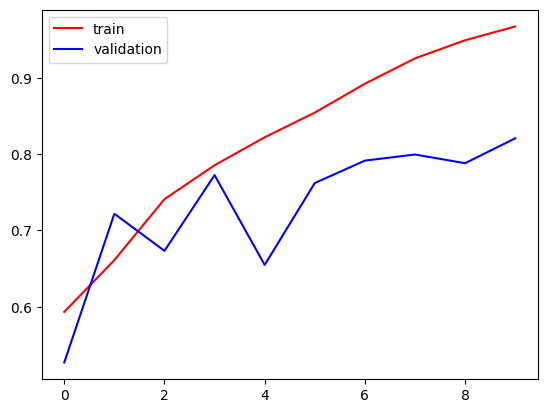

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()
plt.show()


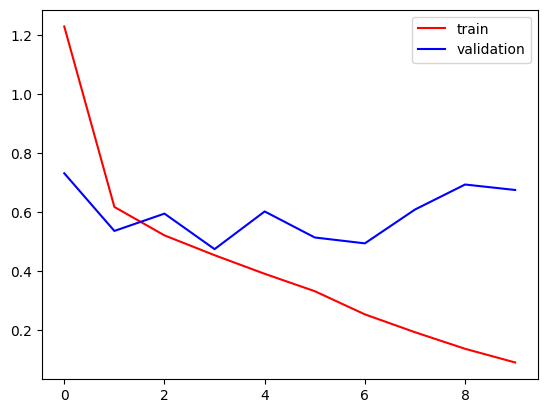

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

plt.legend()
plt.show()


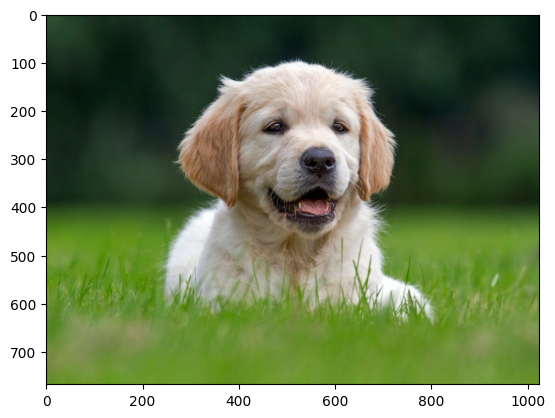

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread("Dog1.jpg")#can change the dog to cat by downloading photos from google


# Convert BGR to RGB (OpenCV loads images in BGR format)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(768, 1024, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
prediction = model.predict(test_input)[0][0]  # Extract the single value

# Get class names
class_names = train_ds.class_names

# Determine predicted class
predicted_label = class_names[0] if prediction < 0.5 else class_names[1]

# Print result
print(f"Predicted Class: {predicted_label} (Confidence: {prediction:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


AttributeError: '_MapDataset' object has no attribute 'class_names'